# Customer Satisfaction Analysis for a Business

As this is a simulated project means am going to generate data on my own through python numpy module
1. installation packages
numpy, pandas, matplotlib, seaborn, handle warnings, scipy module

In [1]:
!pip install numpy pandas matplotlib seaborn scipy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

Since all my modules are ready, now i can start my project

what my dataset will consists
    Customer_ID: A unique identifier for each customer (can be random).
    Product_Quality_Rating: Rating (1 to 10 scale).
    Service_Rating: Rating (1 to 10 scale).
    Price_Rating: Rating (1 to 10 scale).
    Region: Customer’s region (e.g., North, South, East, West).
    Satisfaction: Whether the customer is satisfied (1) or not (0).

In [3]:
#step 1: Data collection, as data is simulated now we generate it no need to collect data
#step 2 : Data Preprocessing as data is generated by us no need to preprocess it
#step 3: Exploratory data analysis
#step 4: Freature extraction
#step 5: feature selection
#step 6: Model building
#step 7:Model evaluation
#step 8 : Model deployment

np.random.seed(0)
#generating data
data = pd.DataFrame({
    "Customer_ID" : np.arange(1,101),
    "Product_Quality_Rating" : np.random.randint(1,11,100),
    "Service_Rating" : np.random.randint(1,11,100),
    "price_rating"  : np.random.randint(1,11,100),
    "Region" : np.random.choice(["North","South","East","West"],100),
    "satisfaction" : np.random.choice([0,1],100)
})


In [4]:
# to find the descriptive stats of the data
data.describe()

,Customer_ID,Product_Quality_Rating,Service_Rating,price_rating,satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.330000,5.570000,5.550000,0.530000
std,29.011492,2.821473,2.958484,2.955478,0.501614
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25.750000,3.000000,3.000000,3.000000,0.000000
50%,50.500000,5.000000,5.000000,5.000000,1.000000
75%,75.250000,8.000000,9.000000,8.000000,1.000000
max,100.000000,10.000000,10.000000,10.000000,1.000000


['Product_Quality_Rating', 'Service_Rating', 'price_rating']


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

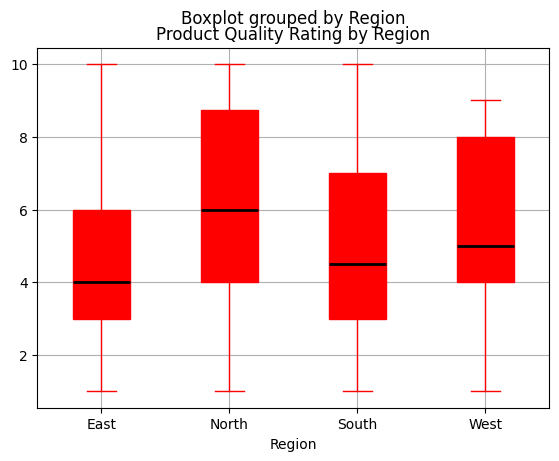

<Figure size 1000x500 with 0 Axes>

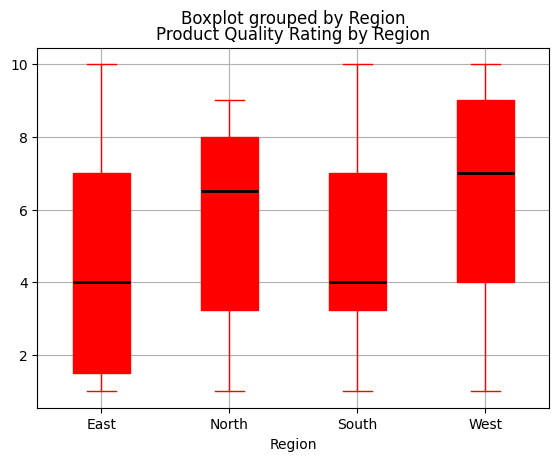

<Figure size 1000x500 with 0 Axes>

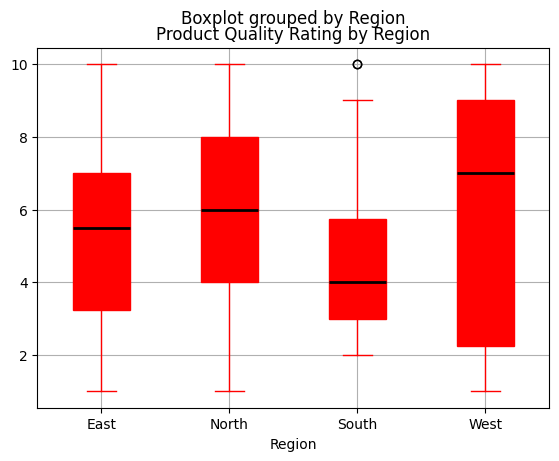

In [5]:
#visualization
plt.figure(figsize=(10,5))
# data.boxplot(column="Product_Quality_Rating",by="Region",patch_artist=True,color = "red",medianprops={"color":"black","linewidth":2})
# plt.title("Product Quality Rating by Region")
# plt.show()


# i have made columns names to list and through slicing i have taken rating columns to visualize how data is distributed

def boxplot_ratings_product(data):
    columns = data.columns.tolist()
    data_cols = columns[1:4]
    print(data_cols)
    for i in data_cols:
        plt.figure(figsize=(10,5))
        data.boxplot(column=i,by="Region",patch_artist=True,color = "red",medianprops={"color":"black","linewidth":2})
        plt.title("Product Quality Rating by Region")
        plt.show()
        
boxplot_ratings_product(data)


# comparing customer ratings against industry standards

In [6]:
# we use z-test
# z-test is used to compare the means of two samples
# null hypothesis : the means of the samples are same
# alternate hypothesis : the means of the samples are different
# if p-value is less than 0.05 we reject null hypothesis else we accept null hypothesis

def z_test(population_mean,sample_mean,sample_std,sample_size):
    z_stats = (sample_mean - population_mean)/(sample_std/np.sqrt(sample_size))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stats)))
    print(f"Z-Stats : {z_stats}")
    if p_value < 0.05:
        print(f"p-value : {p_value.round(2)} < 0.05 Reject Null Hypothesis")
    else:
        print(f"p-value : {p_value.round(2)} > 0.05 Fail to reject null hypothesis")
        
population_mean = 7
sample_mean = np.mean(data["Product_Quality_Rating"])
sample_std = np.std(data["Product_Quality_Rating"],ddof=1) 
sample_size = len(data["Product_Quality_Rating"])
z_test(population_mean,sample_mean,sample_std,sample_size)
   

Z-Stats : -5.9188951859106655
p-value : 0.0 < 0.05 Reject Null Hypothesis


# comparing the satisfaction between North and South

In [7]:
data["Region"].value_counts()

Region
North    30
East     26
West     22
South    22
Name: count, dtype: int64

# as our data size is 100 and we are considering regions which will be not more than 30 i think lets check above, so we do t-test

In [8]:
data = np.array([[19, 11],  # North: 19 satisfied (1's), 11 not satisfied (0's)
                 [10, 12]])  # South: 10 satisfied (1's), 12 not satisfied (0's)

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(data)

# Output results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")


Chi-square statistic: 0.999791013584118
P-value: 0.3173610817420037


In [9]:
north_satisfaction = data[data["Region"] == "North"]["satisfaction"]
south_satisfaction = data[data["Region"] == "South"]["satisfaction"]
t_stats,p_value = stats.ttest_ind(north_satisfaction,south_satisfaction)
print(f"f-stats : {t_stats}, p-value : {p_value}")
if p_value < 0.05:
    print(f"Reject Null Hypothesis as p_value less than 0.05 and hence both samples are different")
else:
    print(f"Fail to Reject Null Hypothesis as p_value greater than 0.05 and hence both samples are same")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# the result of above data is the samples are same
# lets find the variances of the samples
# Null Hypothesis - Variances are same
# Alternate Hypothesis - Variances are different
f_stats = (np.var(north_satisfaction,ddof=1)/np.var(south_satisfaction,ddof=1))
df1 = len(north_satisfaction) - 1
df2 = len(south_satisfaction) - 1
p_value = 2 * min(stats.f.cdf(f_stats,df1,df2),1 - stats.f.cdf(f_stats,df1,df2))
print(f"F-stats is : {f_stats}, p-value is : {p_value}")
if p_value < 0.05:
    print(f"Reject Null hypothesis. Hence Variances are different")
else:
    print("Fail to reject Null Hypothesis, Hence Variances are same")

F-stats is : 0.9248850574712644, p-value is : 0.8314279277768816
Fail to reject Null Hypothesis, Hence Variances are same


# comparing more than one means - Anova test

means of regions

In [ ]:
# null hypothesis is all samples are same
# alternative hypothesis is atleast one sample is different
regions = data["Region"].unique()
samples = [data[data["Region"] == region]["Product_Quality_Rating"] for region in regions]
f_stats,p_value = stats.f_oneway(*samples)
print(f"f-stats : {f_stats}, p-value : {p_value}")
if p_value < 0.05:
    print("Reject Null Hypothesis, Hence atleast one sample mean is different")
else:
    print("Fail to reject Null Hypotheis, Hence all samples means are same")


f-stats : 0.9786207239207447, p-value : 0.40621533835967205
Fail to reject Null Hypotheis, Hence all samples means are same


# average satisfaction

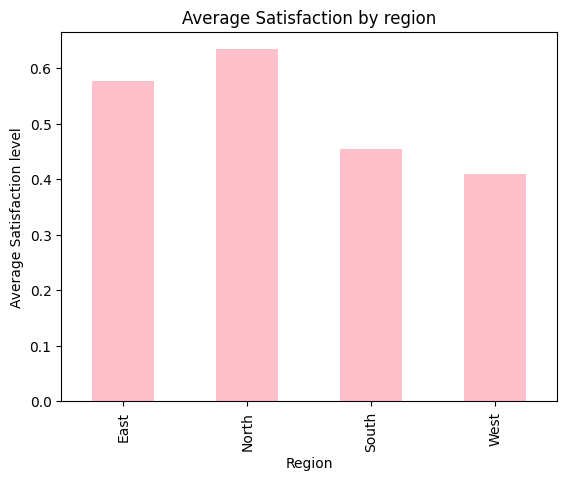

In [ ]:
avg_satisfaction = data.groupby("Region")["satisfaction"].mean()
avg_satisfaction.plot(kind="bar",color = "pink",title = "Average Satisfaction by region")
plt.ylabel("Average Satisfaction level")
plt.show()

In [ ]:
north_satisfaction_count = data[(data["Region"] == "North") & (data["satisfaction"] == 1)]
print(len(north_satisfaction_count))

19


In [ ]:
south_satisfaction_count = data[(data["Region"] == "South") & (data["satisfaction"] == 1)]
print(len(south_satisfaction_count))

10


# conclusion 
1. All the means of the data are same and satisfaction in all regions is same 
2. Our product has equal ratings in all of the regions 
3. As we can see the diffrence in means in barplot but actually there is no difference in satisfaction in terms of regions.
4. So our customers in all the regions has equal point of view in terms of satisfaction.

1. All sample means are the same: The t-test suggests there is no statistically significant difference in satisfaction between the regions, indicating that the sample means for satisfaction are similar across all regions.

2. Product ratings are equal across regions: Our analysis of the data indicates that customer satisfaction ratings for the product are comparable in each region, as per the statistical test results.

3. Difference in means in the barplot is due to random variability: While the barplot visually shows a difference in the average satisfaction between regions, the t-test results (p-value = 0.31) indicate that this difference is likely due to random variability rather than a true effect.

4. No significant difference in customer satisfaction: Statistically, customers in all regions have a similar level of satisfaction with the product, despite the apparent differences shown in the barplot. This suggests that the observed differences in the barplot are not significant enough to conclude that regions perceive the product differently in terms of satisfaction.

# This is also one of the reason that we will get accurate results when we take large samples of data

In [ ]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
os.getcwd()

'c:\\Users\\smdta\\OneDrive\\Desktop\\DA_projects_all\\projects\\project on stats'